
> **Proyecto Combi Go** <br>




*   Nathalia Gómez Jiménez
*   Eduardo Daniel Ramos de los Santos


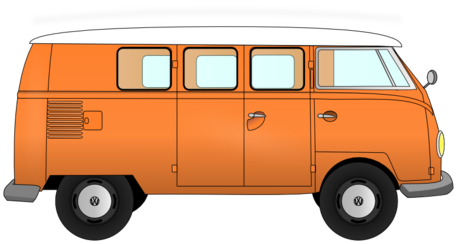

# Importación de librerias

In [ ]:
#Librería pandas para limpieza de datos
import pandas as pd
#Librería matplotlib para hacer gráficas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
from google.colab import files
from google.colab import drive
fecha_str = '01/06/2023'
fecha_datetime = pd.to_datetime(fecha_str, format='%d/%m/%Y')
print(fecha_datetime)

2023-06-01 00:00:00


# Importación de tablas Excel ubicadas en Google Drive

In [ ]:
#Importación de tabla Rutas
rutas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rutas.csv')
# Conversion a CSV
rutas.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Importación de tabla Combis
combis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/combis.csv')
# Conversion a CSV
combis.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Importación de tabla Administradores
administradores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/administradores.csv')
# Conversion a CSV
administradores.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Limpieza de datos de la tabla Rutas

In [ ]:
# Imprimir el encabezado de la tabla
rutas.head()

,id_ruta,id_administrador,Ruta,Recorrido,Descripción,Unnamed: 5,Precio
0,R_TAB01,A_TAB01,Ruta Suburbana 01,Medellín y Pigua 3ra Secc – Villahermosa (Merc...,"Parte de su terminal en Villahermosa, en los a...",NaN,15$
1,R_TAB02,A_TAB02,Ruta Suburbana 02,La Cruz - El Bajío - Dos Montes – Villahermosa...,"Parte de su terminal en Villahermosa, en los a...",NaN,15$
2,R_TAB03,A_TAB03,Ruta Suburbana 03,Las Raíces - Torno Largo - Gaviotas – Villaher...,"Parte de su terminal en Villahermosa, en los a...",NaN,15$
3,R_TAB05,A_TAB06,Ruta Suburbana 05,R/a La Manga - Villahermosa (Mercado),"Parte de su terminal en Villahermosa, en los a...",NaN,15$
4,R_TAB06,A_TAB05,Ruta Suburbana 06,Río Viejo - Villahermosa (Tamulté),"Parte de Villahermosa, en la terminal localiza...",NaN,14$


In [ ]:
# Inspeccionar los tipos de valores que tenemos
rutas.dtypes

id_ruta              object
id_administrador     object
Ruta                 object
Recorrido            object
Descripción          object
Unnamed: 5          float64
Precio               object
dtype: object

> **Problemas con los datos**

1.   **Tarea 1:** Removeremos el símbolo $ de precio

2.   **Tarea 2:** Convertiremos el valor de precio a tipo float

3.   **Tarea 3:**: Eliminaremos el guión (-) y el am y pm

4.   **Tarea 4**: Dividiremos la columna Horario en dos, para Entrada y Salida

5.   **Tarea 5:** Convertiremos el valor del Horario de OBJECT por el tipo TIME

6.   **Tarea 6:** Eliminaremos la columna Unnamed

>Tarea 1: Removeremos el símbolo $ de precio





In [ ]:
# Eliminar el simbilo $
rutas['Precio'] = rutas['Precio'].str.strip("$")
# Verficar cambios
rutas['Precio'].head()

0    15
1    15
2    15
3    15
4    14
Name: Precio, dtype: object



> Tarea 2: Convertir Precio a tipo float



In [ ]:
# Convertir a float
rutas['Precio'] = rutas['Precio'].astype('float')
# Calcular el precio
rutas['Precio'].mean()

14.638297872340425

In [ ]:
# Imprimir el encabezado de la tabla
rutas.head()

,id_ruta,id_administrador,Ruta,Recorrido,Descripción,Unnamed: 5,Precio
0,R_TAB01,A_TAB01,Ruta Suburbana 01,Medellín y Pigua 3ra Secc – Villahermosa (Merc...,"Parte de su terminal en Villahermosa, en los a...",NaN,15.0
1,R_TAB02,A_TAB02,Ruta Suburbana 02,La Cruz - El Bajío - Dos Montes – Villahermosa...,"Parte de su terminal en Villahermosa, en los a...",NaN,15.0
2,R_TAB03,A_TAB03,Ruta Suburbana 03,Las Raíces - Torno Largo - Gaviotas – Villaher...,"Parte de su terminal en Villahermosa, en los a...",NaN,15.0
3,R_TAB05,A_TAB06,Ruta Suburbana 05,R/a La Manga - Villahermosa (Mercado),"Parte de su terminal en Villahermosa, en los a...",NaN,15.0
4,R_TAB06,A_TAB05,Ruta Suburbana 06,Río Viejo - Villahermosa (Tamulté),"Parte de Villahermosa, en la terminal localiza...",NaN,14.0


# Limpieza de datos de la tabla Combis

In [ ]:
# Imprimir el encabezado de la tabla
combis.head()

,Placa,id_ruta,Horario,Turno
0,WSE-83-41,R_TAB01,5:00:00 -1:00:00,M
1,WSE-83-42,R_TAB02,5:00:00 -1:00:00,M
2,WSE-83-43,R_TAB03,5:00:00 -1:00:00,M
3,WSE-83-45,R_TAB05,5:00:00 -1:00:00,M
4,WSE-83-46,R_TAB06,5:00:00 -1:00:00,M


In [ ]:
# Inspeccionar los tipos de valores que tenemos
combis.dtypes

Placa      object
id_ruta    object
Horario    object
Turno      object
dtype: object



> Tarea 3: Eliminaremos el guión (-) y el am y pm



In [ ]:
# Eliminar am y pm
combis['Horario'] = combis['Horario'].str.replace("am","")
# Print the header of the column
combis['Horario'].head()

0    5:00  -1:00 pm
1    5:00  -1:00 pm
2    5:00  -1:00 pm
3    5:00  -1:00 pm
4    5:00  -1:00 pm
Name: Horario, dtype: object

In [ ]:
# Eliminar guion-
combis['Horario'] = combis['Horario'].str.replace("pm","")
# Print the header of the column
combis['Horario'].head()

0    5:00  -1:00 
1    5:00  -1:00 
2    5:00  -1:00 
3    5:00  -1:00 
4    5:00  -1:00 
Name: Horario, dtype: object

In [ ]:
# Dividir por coma
combis['Horario'] = combis['Horario'].str.replace(",,",",")
# Print the header of the column
combis['Horario'].head()

0    5:00  -1:00 
1    5:00  -1:00 
2    5:00  -1:00 
3    5:00  -1:00 
4    5:00  -1:00 
Name: Horario, dtype: object

In [ ]:
# Agregar :00 para los segundos
combis['Horario'] = combis['Horario'].str.replace(":00",":00:00")
# Print the header of the column
combis['Horario'].head()

0    5:00:00  -1:00:00 
1    5:00:00  -1:00:00 
2    5:00:00  -1:00:00 
3    5:00:00  -1:00:00 
4    5:00:00  -1:00:00 
Name: Horario, dtype: object



> Tarea 4: Cambiaremos M por Matutino y V por Vespertino



In [ ]:
combis['Turno'] = combis['Turno'].str.replace("M","Matutino")
combis['Turno'] = combis['Turno'].str.replace("V","Vespertino")
combis['Turno'].head()

0    Matutino
1    Matutino
2    Matutino
3    Matutino
4    Matutino
Name: Turno, dtype: object

# Limpieza de datos de la tabla Administradores

In [ ]:
# Imprimir el encabezado de la tabla
administradores.head()

,id_administrador,Administrador,Teléfono
0,A_TAB01,"Transportes Unidos de Medellín y Pigua, S.A. d...",993 458 1203
1,A_TAB02,"Denvalsa, S. de R.L. de C.V.",994 458 1203
2,A_TAB03,"Transportes Torno Largo, S. de R.L. de C.V.",995 458 1203
3,A_TAB04,Transportes Guayacán S.A. de C.V.,996 458 1203
4,A_TAB05,"Transportes La Isla, S. de R.L. de C.V.",997 458 1203


In [ ]:
# Inspeccionar los tipos de valores que tenemos
administradores.dtypes

id_administrador    object
Administrador       object
Teléfono            object
dtype: object

# Gráficas para visualizar la cantidad de combis por turno

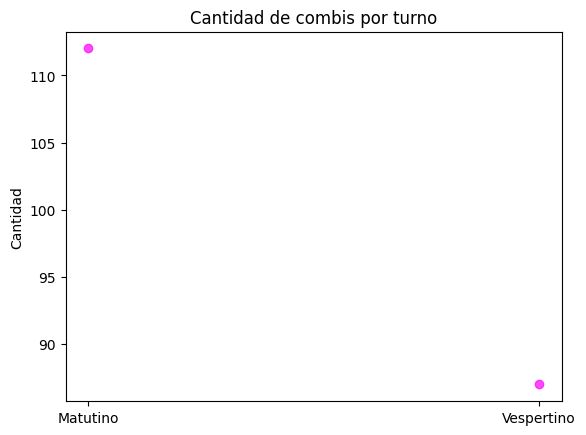

In [ ]:
# Calcular la cantida de combis por turno
turno = combis['Turno'].value_counts()
combi_por_turnos = turno.head(10)
combi_por_turnos = pd.DataFrame({'Turno': combi_por_turnos.index, 'Frecuencia': combi_por_turnos.values})
combi_por_turnos['Valor'] = range(1, len(combi_por_turnos) + 1)
plt.scatter(combi_por_turnos['Valor'], combi_por_turnos['Frecuencia'], color='fuchsia', alpha=0.7)
plt.title('Cantidad de combis por turno')
plt.xlabel('')
plt.ylabel('Cantidad')
plt.xticks(combi_por_turnos['Valor'], combi_por_turnos['Turno'], rotation=0)
plt.show()

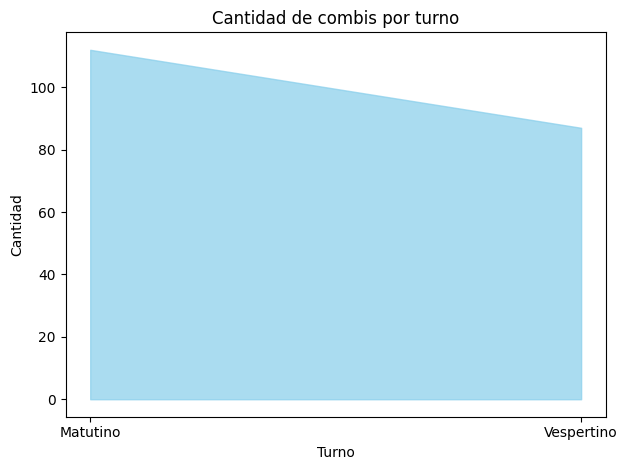

In [ ]:
# Calcular la cantida de combis por turno
turno = combis['Turno'].value_counts()
combi_por_turnos = turno.head(10)
# Crear un DataFrame con los datos del turno y su frecuencia
combi_por_turnos = pd.DataFrame({'Turno': combi_por_turnos.index, 'Frecuencia': combi_por_turnos.values})
# Crear una gráfica de área con color rosa
plt.fill_between(combi_por_turnos['Turno'], combi_por_turnos['Frecuencia'], color='SkyBlue', alpha=0.7)
plt.title('Cantidad de combis por turno')
plt.xlabel('Turno')
plt.ylabel('Cantidad')
plt.xticks(combi_por_turnos['Turno'], rotation=0)
plt.tight_layout()
plt.show()

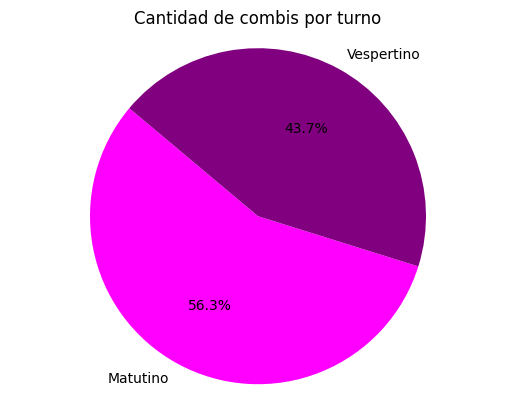

In [ ]:
# Calcular la cantidad de combis por turno
turno = combis['Turno'].value_counts()
combi_por_turnos = turno.head(2)
# Crear una gráfica de pastel con color rosa
plt.pie(combi_por_turnos, labels=combi_por_turnos.index, colors=['fuchsia', 'purple'], autopct='%1.1f%%', startangle=140)
plt.title('Cantidad de combis por turno')
plt.axis('equal')
plt.show()

# Gráficas para visualizar los administradores más comunes y resaltar el mayor

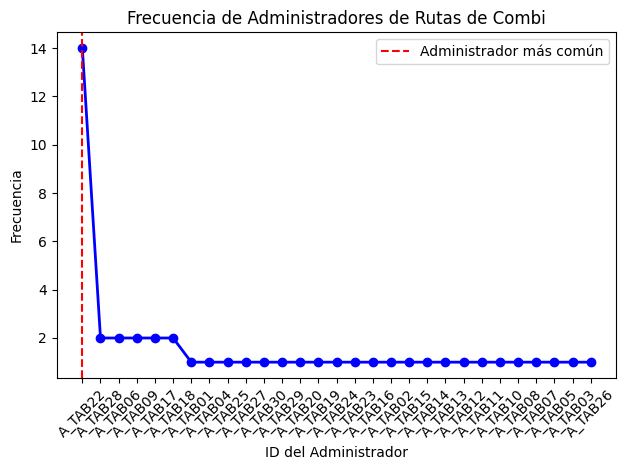

In [ ]:
# Calcular la frecuencia de cada administrador en la tabla "Rutas"
frecuencia_administradores = rutas['id_administrador'].value_counts()

# Encontrar el administrador más común
administrador_mas_comun = frecuencia_administradores.idxmax()

# Filtrar los datos para obtener solo las rutas del administrador más común
rutas_administrador_mas_comun = rutas[rutas['id_administrador'] == administrador_mas_comun]

# Calcular la cantidad de veces que aparece el administrador más común en la tabla "Rutas"
cantidad_administrador_mas_comun = len(rutas_administrador_mas_comun)

# Crear la gráfica de línea
plt.plot(frecuencia_administradores.index, frecuencia_administradores.values, marker='o', color='blue', linestyle='-', linewidth=2)

plt.title('Frecuencia de Administradores de Rutas de Combi')
plt.xlabel('ID del Administrador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Resaltar el administrador más común en la gráfica
plt.axvline(x=administrador_mas_comun, color='red', linestyle='--', label='Administrador más común')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-51-0306c343c68c>:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


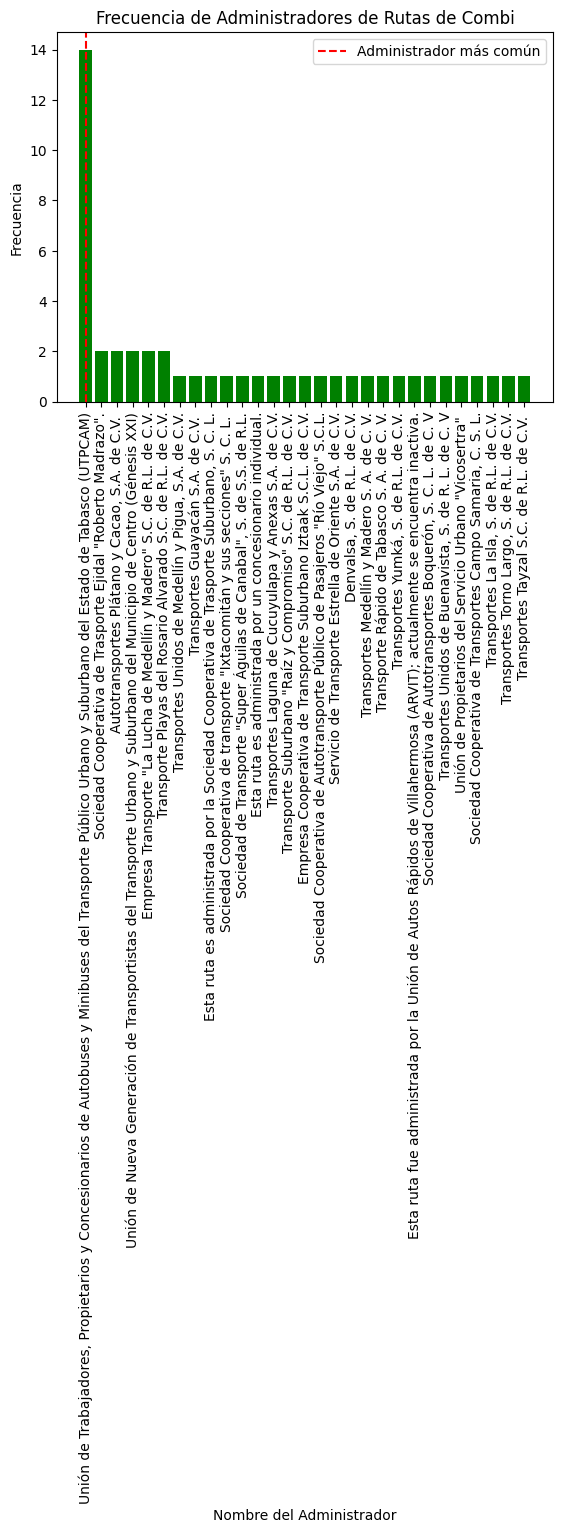

In [51]:
#De la siguiente forma se pueden ver los respectivos nombres, pero al ser largos no se ven muy presentables
# Combinar las tablas "Rutas" y "Administradores" usando el id_administrador como clave
rutas_con_administradores = rutas.merge(administradores, on='id_administrador', how='left')

# Calcular la frecuencia de cada administrador en la tabla "Rutas"
frecuencia_administradores = rutas_con_administradores['Administrador'].value_counts()

# Encontrar el administrador más común
administrador_mas_comun = frecuencia_administradores.idxmax()

# Filtrar los datos para obtener solo las rutas del administrador más común
rutas_administrador_mas_comun = rutas_con_administradores[rutas_con_administradores['Administrador'] == administrador_mas_comun]

# Calcular la cantidad de veces que aparece el administrador más común en la tabla "Rutas"
cantidad_administrador_mas_comun = len(rutas_administrador_mas_comun)

# Crear la gráfica de barras
plt.bar(frecuencia_administradores.index, frecuencia_administradores.values, color='green')

plt.title('Frecuencia de Administradores de Rutas de Combi')
plt.xlabel('Nombre del Administrador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Resaltar el administrador más común en la gráfica
plt.axvline(x=administrador_mas_comun, color='red', linestyle='--', label='Administrador más común')
plt.legend()

plt.tight_layout()
plt.show()